In [172]:
# Import necessary packages
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [173]:
list_of_genres = ['children', 'fantasy', 'magical', 'mystery', 'action', 'crime', 'drama', 'science fiction', 'adventure', 'biography', 'comedy', 'thriller', 'musical', 'western', 'romance', 'animation', 'war', 'horror', 'sport', 'political', 'saga', ' satire', 'social']
war_grades = {'children':1, 'fantasy':3, 'magical':3, 'mystery':4, 'action':7, 'crime':8, 'drama':7, 'SF':5, 'adventure': 4, 'biography':5, 'comedy':4, 'thriller':4, 'musical':4, 'western':8, 'romance': 2, 'war':10, 'horror':4, 'sport':3, 'political':6, 'saga':3, 'satire':2, 'social':4, 'animation':2}
war_grades_df = pd.DataFrame(war_grades.items(), columns=['Genres', 'Grade'])
#war_grades_df.set_index('Genres')

In [174]:
#Works
def get_IMDB_names(url):
    rn = requests.get(url)
    soup = BeautifulSoup(rn.text, 'html.parser')
    movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')
    names = []
    for container in movie_containers:
# Extract:
# The name
        name = container.select('img')[0]['alt']
        names.append(name)
    return names

In [175]:
def get_IMDB_years(url):
    ry = requests.get(url)
    soup = BeautifulSoup(ry.text, 'html.parser')
    movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')
    years = []
    for container in movie_containers:
        # The year
        year = container.find('span', class_ = 'lister-item-year').text
        year = str(year)
        years.append(year)
        year = str(year)
        year = year[1:5]
    return years

In [176]:
def get_IMDB_genres(url):
    rg = requests.get(url)
    soup = BeautifulSoup(rg.text, 'html.parser')
    movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')
    genres =[] 
    for container in movie_containers:
        genre_container = container.find('p')
        genre = genre_container.find('span', class_='genre')
        #genre = genre.text
        #genre = str(genre)
        #genre = genre[1:]
        genres.append(genre)
    return genres

In [177]:
def gen_url(year):
    url = 'https://www.imdb.com/search/title/?release_date='+ str(year) + '-01-01,' + str(year) + '-12-31&user_rating=1.0,10.0&countries=us&sort=user_rating,desc&count=250'
    return url

In [182]:
#function that will get the violence grade for a year
def get_IMDB_table_popularity(year):
    url = 'https://www.imdb.com/search/title/?title_type=feature&release_date='+ str(year) +'-01-01'+ str(year)+'-12-31&user_rating=5.0,10.0&countries=us&sort=moviemeter,desc&count=250'
    #url = 'https://www.imdb.com/search/title/?release_date='+ str(year) + '-01-01,' + str(year) + '-12-31&user_rating=1.0,10.0&countries=us&sort=user_rating,desc&count=250'
    names = get_IMDB_names(url)
    #years = get_IMDB_years(url)
    genres = get_IMDB_genres(url)
    initial_df = pd.DataFrame({'name': names, 'genre': genres})
    #turn BS elements into strings
    initial_df['genre']=initial_df['genre'].map(lambda x: str(x))
    # add a year column             
    years = [year]*len(initial_df)
    initial_df['year'] = years
    return initial_df
get_IMDB_table_plain(1980)  


,name,genre,year
0,"The Carpenters: Music, Music, Music","<span class=""genre"">\nMusic </span>",1980
1,The Raven,"<span class=""genre"">\nShort, Thriller ...",1980
2,The Wolf Man,"<span class=""genre"">\nShort, Horror ...",1980
3,Linda Ronstadt in Concert,"<span class=""genre"">\nMusic </span>",1980
4,The Mouseketeer Reunion,"<span class=""genre"">\nAdventure, Drama, Family...",1980
...,...,...,...
245,Michael Landon/Paul Ehrlich/Jim Fowler,"<span class=""genre"">\nComedy, Talk-Show ...",1980
246,The Inside Story with Slim Goodbody,"<span class=""genre"">\nFamily </span>",1980
247,Daredevil Death Wish,"<span class=""genre"">\nDocumentary, Sci-Fi ...",1980
248,The Longest Day,"<span class=""genre"">\nComedy </span>",1980


In [183]:
pieces = []
for year in [*range(1980,2019,1)]:
    popularity_df= get_IMDB_table_popularity(year)
    pieces.append(popularity_df)
df_popularity_all = pd.concat(pieces)
df_all.to_csv('IMDB_popularity_80_19.csv', index=False, header = True)


In [178]:
#function that will get the violence grade for a year
def get_IMDB_table(year):
    url = 'https://www.imdb.com/search/title/?release_date='+ str(year) + '-01-01,' + str(year) + '-12-31&user_rating=1.0,10.0&countries=us&sort=user_rating,desc&count=250'
    names = get_IMDB_names(url)
    #years = get_IMDB_years(url)
    genres = get_IMDB_genres(url)
    initial_df = pd.DataFrame({'name': names, 'genre': genres})
    #turn BS elements into strings
    initial_df['genre']=initial_df['genre'].map(lambda x: str(x))
    # add a year column             
    years = [year]*len(initial_df)
    initial_df['year'] = years
    #create a list with all the genres from the "Genres" column and lower the case of each element
    list_year_1 = initial_df['genre'].to_list()
    lower_list = [x.lower() for x in list_year_1]
    #separate the genres where a movie has two or more genres
    list_final = [x.split() for x in lower_list]
    list_year = []
    for sublist in list_final:
        for item in sublist:
            if item == '<span':
                continue
            elif item == 'class="genre">':
                continue
            elif item == '</span>':
                continue
            else:
                list_year.append(item)
    #some genres have comma attached, take off comma
            list_year_no_comma = []
            for item in list_year:
                if ',' in item:
                        list_year_no_comma.append(item[:-1])
                else:
                            list_year_no_comma.append(item)
    #return list_year_no_comma
    # Create a dictionary key- genres, value = number of movies of a certain genre
    genre_counts = {}
# Iterate through genre list
    for genre in list_year_no_comma:
# Update word counts - keep only genres in the general list of genres
        
#Set 'Genres' as df index
    df_to_plot = pd.DataFrame(genre_counts.items(), columns=['Genres', 'Year'])
    #return df_to_plot
    df_to_plot.set_index('Genres')
# Join the the 2 Dataframes on 'Genres' column and replace NANs with mean value.
    Zeitgeist_df = war_grades_df.join(df_to_plot.set_index('Genres'), on='Genres')
    Zeitgeist_df = Zeitgeist_df.fillna(5)
#Create a column year_war_grade 
    Zeitgeist_df['year_war_grade'] = Zeitgeist_df['Grade']*Zeitgeist_df['Year']
# Add a year column
    year = year
    years_final = [year]*len(Zeitgeist_df)
    Zeitgeist_df['Year'] = years_final
    del Zeitgeist_df['Grade']
    #grouped = Zeitgeist_df.groupby('Year').mean()
    #df_all.to_csv('IMDB_grade.csv', index=False, header = True)
           
    return Zeitgeist_df
#Zeitgeist1981 = get_IMDB_table(1981)
#Zeitgeist1981


In [179]:
df1 = get_IMDB_table(1981)
df1

,Genres,Year,year_war_grade
0,children,1981,5.0
1,fantasy,1981,9.0
2,magical,1981,15.0
3,mystery,1981,80.0
4,action,1981,126.0
5,crime,1981,192.0
6,drama,1981,574.0
7,SF,1981,25.0
8,adventure,1981,88.0
9,biography,1981,30.0


In [180]:
df2 = get_IMDB_table(1982)
df2

,Genres,Year,year_war_grade
0,children,1982,5.0
1,fantasy,1982,9.0
2,magical,1982,15.0
3,mystery,1982,40.0
4,action,1982,56.0
5,crime,1982,136.0
6,drama,1982,441.0
7,SF,1982,25.0
8,adventure,1982,64.0
9,biography,1982,10.0


In [170]:
df = pd.concat(df1, df2)
df

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [111]:
grade1980 = get_IMDB_table(1980)
grade1980

,year_war_grade
Year,
1980,74.173913


In [164]:
grade1980['year_war_grade']

Year
1980    74.173913
Name: year_war_grade, dtype: float64

In [112]:
grade1981 = get_IMDB_table(1981)
grade1981

,year_war_grade
Year,
1981,82.782609


In [113]:
grade1982 = get_IMDB_table(1982)
grade1982

,year_war_grade
Year,
1982,66.782609


In [114]:
grade1983 = get_IMDB_table(1983)
grade1980

,year_war_grade
Year,
1980,74.173913


In [115]:
grade1984 = get_IMDB_table(1984)
grade1984

,year_war_grade
Year,
1984,69.782609


In [117]:
grade1985 = get_IMDB_table(1985)
grade1985

,year_war_grade
Year,
1985,69.782609


In [118]:
grade1986 = get_IMDB_table(1986)
grade1986

,year_war_grade
Year,
1986,76.869565


In [119]:
grade1987 = get_IMDB_table(1987)
grade1987

,year_war_grade
Year,
1987,82.869565


In [120]:
grade1988 = get_IMDB_table(1988)
grade1988

,year_war_grade
Year,
1988,93.0


In [121]:
grade1989 = get_IMDB_table(1989)
grade1989

,year_war_grade
Year,
1989,98.347826


In [122]:
grade1990 = get_IMDB_table(1990)
grade1990

,year_war_grade
Year,
1990,91.73913


In [123]:
grade1991 = get_IMDB_table(1991)
grade1991

,year_war_grade
Year,
1991,68.956522


In [124]:
grade1992 = get_IMDB_table(1992)
grade1992

,year_war_grade
Year,
1992,70.347826


In [125]:
grade1993 = get_IMDB_table(1993)
grade1993

,year_war_grade
Year,
1993,74.130435


In [126]:
grade1994 = get_IMDB_table(1994)
grade1994

,year_war_grade
Year,
1994,74.086957


In [127]:
grade1995 = get_IMDB_table(1995)
grade1995

,year_war_grade
Year,
1995,92.347826


In [128]:
grade1996 = get_IMDB_table(1996)
grade1996

,year_war_grade
Year,
1996,80.130435


In [129]:
grade1997 = get_IMDB_table(1997)
grade1997

,year_war_grade
Year,
1997,86.086957


In [130]:
grade1998 = get_IMDB_table(1998)
grade1998

,year_war_grade
Year,
1998,89.521739


In [131]:
grade1999 = get_IMDB_table(1999)
grade1999

,year_war_grade
Year,
1999,91.956522


In [132]:
grade2001 = get_IMDB_table(2001)
grade2001

,year_war_grade
Year,
2001,95.0


In [133]:
grade2002 = get_IMDB_table(2002)
grade2002

,year_war_grade
Year,
2002,88.043478


In [134]:
grade2003 = get_IMDB_table(2003)
grade2003

,year_war_grade
Year,
2003,76.0


In [135]:
grade2004 = get_IMDB_table(2004)
grade2004

,year_war_grade
Year,
2004,71.869565


In [136]:
grade2005 = get_IMDB_table(2005)
grade2005

,year_war_grade
Year,
2005,72.695652


In [137]:
grade2006 = get_IMDB_table(2006)
grade2006

,year_war_grade
Year,
2006,61.26087


In [138]:
grade2007 = get_IMDB_table(2007)
grade2007

,year_war_grade
Year,
2007,67.565217


In [139]:
grade2008 = get_IMDB_table(2008)
grade2008

,year_war_grade
Year,
2008,61.217391


In [140]:
grade2009 = get_IMDB_table(2009)
grade2009

,year_war_grade
Year,
2009,74.826087


In [141]:
grade2011 = get_IMDB_table(2011)
grade2011

,year_war_grade
Year,
2011,82.086957


In [142]:
grade2012 = get_IMDB_table(2012)
grade2012

,year_war_grade
Year,
2012,83.73913


In [143]:
grade2013 = get_IMDB_table(2013)
grade2013

,year_war_grade
Year,
2013,89.043478


In [144]:
grade2014 = get_IMDB_table(2014)
grade2014

,year_war_grade
Year,
2014,95.956522


In [145]:
grade2015 = get_IMDB_table(2015)
grade2015

,year_war_grade
Year,
2015,85.173913


In [146]:
grade2016 = get_IMDB_table(2016)
grade2016

,year_war_grade
Year,
2016,78.826087


In [147]:
grade2017 = get_IMDB_table(2017)
grade2017

,year_war_grade
Year,
2017,66.521739


In [148]:
grade2018 = get_IMDB_table(2018)
grade2018

,year_war_grade
Year,
2018,66.826087


In [149]:
grade2019 = get_IMDB_table(2019)
grade2019

,year_war_grade
Year,
2019,64.73913


In [150]:
grade2010 = get_IMDB_table(2010)
grade2010

,year_war_grade
Year,
2010,84.913043


In [ ]:
#pieces = (grade1980, grade1981, grade1982, grade1983, grade1984, grade1985, grade1986, grade1987, grade1988, grade1988,
          grade1990, grade1991, grade1992, grade1993, grade1994, grade1995, grade1996, grade1997, grade1998, grade1999,
          grade2000, grade2001,grade2002, grade2003, grade2004, grade2005, grade2006, grade2007, grade2008, grade2009,
         grade2010, grade2011, grade2012, grade2013, grade2014, grade2015, grade2016,  grade2017, grade2018, grade2019  )

In [155]:
type(grade1980)

pandas.core.frame.DataFrame

In [158]:
pieces = []
for year in [*range(1980,1985,1)]:
    grade_df= get_IMDB_table(year)
    pieces.append(grade_df)
pieces



[      year_war_grade
 Year                
 1980       74.173913,       year_war_grade
 Year                
 1981       82.782609,       year_war_grade
 Year                
 1982       66.782609,       year_war_grade
 Year                
 1983       68.304348,       year_war_grade
 Year                
 1984       69.782609]

In [159]:
df_all = pd.concat(pieces)
df_all.to_csv('IMDB_grade_80_85.csv', index=False, header = True)
df_all

,year_war_grade
Year,
1980,74.173913
1981,82.782609
1982,66.782609
1983,68.304348
1984,69.782609


In [162]:
pieces2 = []
for year in [*range(1990,1995,1)]:
    grade_df1= get_IMDB_table(year)
    pieces.append(grade_df1)
pieces2


[]

In [ ]:
df_all1 = pd.concat(pieces)
df_all1.to_csv('IMDB_grade_85_90.csv', index=False, header = True)
df_all1

In [101]:
df_all1 = pd.concat(pieces80_85)
df_all1.to_csv(IMDB80_90.csv', index=False, header=True)

In [107]:
pieces85_90 = []
for year1 in [*range(1985, 1990,1)]:
    df2 = get_IMDB_table(year1)
    pieces85_90.append(df_85_90)
pieces85_90[0]
#df_all = pd.concat(pieces)
#df_all
#df_all.to_csv('IMDB_85_90.csv', index=False, header= True) 

,year_war_grade
Year,
1989,98.347826


In [ ]:
df_all2 = pd.concat(pieces2)
df_all

In [108]:
pieces3 = []
for year3 in [*range(1990, 1995,1)]:
    df_90_95 = get_IMDB_table(year3)
    pieces.append(df_90_95)
pieces3
#df_all2 = pd.concat(pieces)
#df_all2
#df_all.to_csv('IMDB_90_95.csv', index=False, header= True) 

[]

In [34]:
grouped3 = df_all.groupby(['Year'])['year_war_grade'].sum()
grouped.to_csv('grouped_90_95.csv', index='Year', header=True)

In [35]:
pieces4 = []
for year in [*range(1995, 2000,1)]:
    df_95_00 = get_IMDB_table(year)
    pieces.append(df_95_00)
df_all = pd.concat(pieces)
df_all
df_all.to_csv('IMDB_95_00.csv', index=False, header= True) 

In [36]:
grouped4 = df_all.groupby(['Year'])['year_war_grade'].sum()
grouped.to_csv('grouped_95_00.csv', index='Year', header=True)

In [37]:
pieces4 = []
for year in [*range(2000, 2005,1)]:
    df_00_05 = get_IMDB_table(year)
    pieces.append(df_00_05)
df_all = pd.concat(pieces)
df_all
df_all.to_csv('IMDB_00_05.csv', index=False, header= True) 

In [38]:
grouped5 = df_all.groupby(['Year'])['year_war_grade'].sum()
grouped.to_csv('grouped_00_05.csv', index='Year', header=True)

In [39]:
pieces6 = []
for year in [*range(2005, 2010,1)]:
    df_05_10 = get_IMDB_table(year)
    pieces.append(df_05_10)
df_all = pd.concat(pieces)
df_all
df_all.to_csv('IMDB_05_10.csv', index=False, header= True) 

In [40]:
grouped6 = df_all.groupby(['Year'])['year_war_grade'].sum()
grouped.to_csv('grouped_05_10.csv', index='Year', header=True)

In [41]:
pieces7 = []
for year in [*range(2010, 2015,1)]:
    df_10_15 = get_IMDB_table(year)
    pieces.append(df_10_15)
df_all = pd.concat(pieces)
df_all
df_all.to_csv('IMDB_10_15.csv', index=False, header= True) 

In [42]:
grouped7 = df_all.groupby(['Year'])['year_war_grade'].sum()
grouped.to_csv('grouped_10_15.csv', index='Year', header=True)

In [43]:
pieces8 = []
for year in [*range(2015, 2020,1)]:
    df_15_20 = get_IMDB_table(year)
    pieces.append(df_15_20)
df_all = pd.concat(pieces)
df_all
df_all.to_csv('IMDB_15_20.csv', index=False, header= True) 

In [44]:
grouped8 = df_all.groupby(['Year'])['year_war_grade'].sum()
grouped.to_csv('grouped_15_20.csv', index='Year', header=True)

In [59]:
df1 = pd.read_csv('grouped_80_85.csv')
df2 = pd.read_csv('grouped_85_90.csv')
df3 = pd.read_csv('grouped_90_95.csv')
df4 = pd.read_csv('grouped_95_00.csv')
df5 = pd.read_csv('grouped_00_05.csv')
df6 = pd.read_csv('grouped_05_10.csv')
df7 = pd.read_csv('grouped_10_15.csv')
df8 = pd.read_csv('grouped_15_20.csv')
pieces = [df1,df2,df3,df4,df5,df6,df7,df8]
df_all = pd.concat(pieces)
df_all
#df_all.to_csv('violence_grade_IMDB.csv', index=False, header= True)  

,Year,year_war_grade
0,2015,1959.0
1,2016,1813.0
2,2017,1530.0
3,2018,1537.0
4,2019,1477.0
0,2015,1959.0
1,2016,1813.0
2,2017,1530.0
3,2018,1537.0
4,2019,1477.0


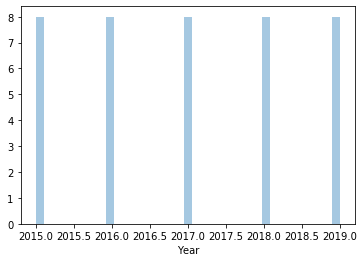

In [71]:
#titanic=sns.load_dataset('titanic')    
year=df_all['Year'].dropna()
sns.distplot(year,bins=39,kde=False)
plt.show()

x_values_all= df_all['Year'].to_list()
#x_values_all
y_values_all= df_all['year_war_grade'].to_list()
#y_values_all
plt.figure(figsize=(15,8))    
plt.scatter(x_values_all, y_values_all, label="Evolution of violence in movies 1980-2019")
plt.xlabel("Year")
plt.ylabel("Level of violence")
plt.set_xlim(1980, 2020), 
plt.set_ylim(0,3000)
plt.show()

x = df_all['Year'].to_list()
y = df_all['year_war_grade'].to_list()
plt.plot(x,y)

xticks = np.linspace(start=1980, stop=2020, num=1)
yticks = np.linspace(start=0, stop=5000, num=1)
plt.xticks(xticks); #Adding a semicolon after the call will prevent extraneous input from being displayed
plt.yticks(yticks);

df = get_IMDB_table(x)
df.head()
type(df.genre[0])


#turn objects in genre column into strings
#df.genre[0] = df.genre[0].text
df['genre']=df['genre'].map(lambda x: str(x))
#df['genre']= df['genre'].map(lambda x: x[20:-7])
df['genre'].head()
#df.genre[0]=df.genre[0][20:-7]

#Function that will scrape a wikipedia page with a list of movies by year, add the year as a new column and return 
# a data frame.

def get_table(year):
    url = 'https://www.imdb.com/search/title/?release_date='+ str(year) + '-01-01,' + str(year) + '-12-31&user_rating=1.0,10.0&countries=us&sort=user_rating,desc&count=250'
    df = get_IMDB_table(url)
    return df.head()
# add a year column             
    #years = [year]*len(df)
    #df['Year'] = years
#create a list with all the genres from the "Genres" column and lower the case of each element
    #list_year_1 = df['genres'].to_list()
    #lower_list = [x.lower() for x in list_year_1]
#separate the genres where a movie has two or more genres
    #list_final = [x.split() for x in lower_list]
    #list_year = []
    #for sublist in list_final:
        #for item in sublist:
            #list_year.append(item)  
#some genres have comma attached, take off comma
    #list_year_no_comma = []
    #for item in list_year:
        #if ',' in item:
         #               list_year_no_comma.append(item[:-1])
        #else:
        #                    list_year_no_comma.append(item)
#print(list_year_no_comma)
# Create a dictionary key- genres, value = number of movies of a certain genre
        #genre_counts = {}
# Iterate through genre list
        #for genre in list_year_no_comma:
# Update word counts - keep only genres in the general list of genres
            #if genre in list_of_genres:
                #genre_counts[genre] = genre_counts.get(genre, 0) + 1 #Get previous entry, update by 1
            #else:
                #continue
#Set 'Genres' as df index
        #df_to_plot = pd.DataFrame(genre_counts.items(), columns=['Genres', 'year_1999'])
        #df_to_plot.set_index('Genres')
# Join the the 2 Dataframes on 'Genres' column and replace NANs with mean value.
        #Zeitgeist_df1 = war_grades_df.join(df_to_plot.set_index('Genres'), on='Genres')
        #Zeitgeist_df1 = Zeitgeist_df1.fillna(5)
#Create a column year_war_grade 
        #Zeitgeist_df1['year_war_grade'] = Zeitgeist_df1['Grade']*Zeitgeist_df1['year_1999']
            #Zeitgeist_df1
# Add a year column
            #year = 1999
        #years_final = [year]*len(Zeitgeist_df1)
        #Zeitgeist_df1['Year'] = years_final
           
    #return Zeitgeist_df1
#Zeitgeist1981 = get_table_after_1996(1981)
#Zeitgeist1981
get_table(1981)

pieces = []
for year in [*range(1999, 2004,1)]:
    url = 'http://en.wikipedia.org/wiki/List_of_American_films_of_'+ str(year)
    df = get_table_after_1996(year)
    pieces.append(df)



df_all = pd.concat(pieces)
df_all
df_all.to_csv('9_11.csv', index=False, header= True)

grouped = df_all.groupby(['Year'])['year_war_grade'].sum()
grouped.to_csv('grouped.csv', index='Year', header=True)